## AutoEncoder for Anomaly detection for ECG data

In [34]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

In [35]:
import urllib.request
url= 'http://timeseriesclassification.com/Downloads/ECG5000.zip'
response=urllib.request.urlopen(url)
data=response.read()
response.close()
local=open('download.zip','wb')
local.write(data)
local.close()

In [36]:
from zipfile import ZipFile
with ZipFile ('download.zip','r') as zipObj:
    zipObj.extractall()

In [42]:
df1=pd.read_csv('ECG5000_TRAIN.txt',header=None, delimiter=r"\s+")

In [43]:
df2=pd.read_csv('ECG5000_TEST.txt',header=None, delimiter=r"\s+")

In [44]:
df1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456


In [45]:
ecg_final=pd.concat([df1,df2])

In [47]:
ecg_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4499
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


In [50]:
ecg_final.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [51]:
#column 0 is the label for ECG

In [54]:
ecg_final=ecg_final.add_prefix('c')

In [55]:
ecg_final.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456


In [56]:
ecg_final['c0'].value_counts()

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: c0, dtype: int64

In [77]:
train_data,test_data, train_labels, test_labels=train_test_split(ecg_final.values,ecg_final.values[:,0:1],test_size=0.25,random_state=42)

In [78]:
scaler=MinMaxScaler()
data_scaled=scaler.fit(train_data)# learn or scale the train data and transform the test data and train data

In [79]:
train_data_scaled=data_scaled.transform(train_data)
test_data_scaled=data_scaled.transform(test_data)

In [80]:
train_data_scaled

array([[0.25      , 0.57851085, 0.67181321, ..., 0.59333903, 0.52498849,
        0.46498257],
       [0.5       , 0.49766319, 0.62730795, ..., 0.53350842, 0.50718448,
        0.40151486],
       [0.75      , 0.56617213, 0.55041073, ..., 0.49988298, 0.49859467,
        0.43533427],
       ...,
       [0.        , 0.45442466, 0.35540716, ..., 0.77837157, 0.74294265,
        0.50709418],
       [0.25      , 0.40345124, 0.39132017, ..., 0.4868497 , 0.50193227,
        0.47770011],
       [0.        , 0.37134117, 0.25002207, ..., 0.71048947, 0.65626497,
        0.35023474]])

In [81]:
normal_train_data=pd.DataFrame(train_data_scaled).add_prefix('c').query('c0==0').values[:,1:]
anomaly_train_data=pd.DataFrame(train_data_scaled).add_prefix('c').query('c0>0').values[:,1:]


In [82]:
normal_test_data=pd.DataFrame(test_data_scaled).add_prefix('c').query('c0==0').values[:,1:]
anomaly_test_data=pd.DataFrame(test_data_scaled).add_prefix('c').query('c0>0').values[:,1:]

In [83]:
print(normal_train_data.shape)
print(normal_test_data.shape)

(2195, 140)
(724, 140)


In [85]:
print(anomaly_train_data.shape)
print(anomaly_test_data.shape)

(1555, 140)
(526, 140)


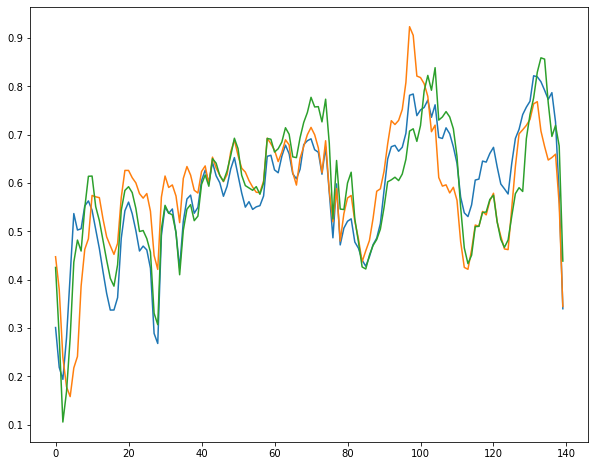

In [86]:
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])

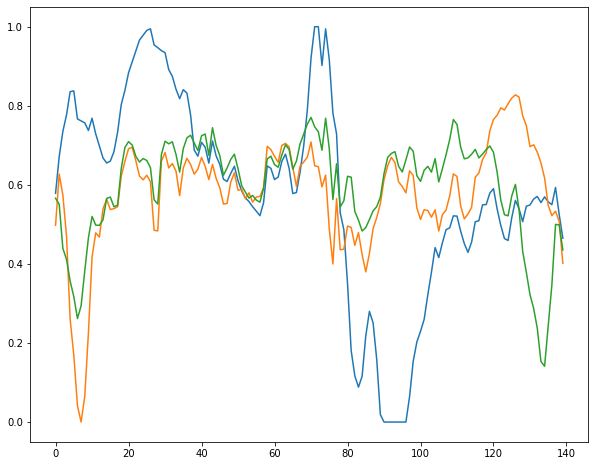

In [87]:
plt.plot(anomaly_train_data[0])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data[2])

In [88]:
# build a sequential model like down sampling and upsampling
# when a anomaly data gets intu this sequential layer, it is not reconstructed efficiently 
# the difference in the reconstruction is called the reconstruction error and that is what the autoencoder does

In [90]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(140,activation='sigmoid'))

In [95]:
class AutoEncoder(Model):
    def __init__(self):
        
        super(AutoEncoder, self).__init__()
        
        self.encoder=tf.keras.Sequential([
            tf.keras.layers.Dense(64,activation='relu'),
            tf.keras.layers.Dense(32,activation='relu'),
            tf.keras.layers.Dense(16,activation='relu'),
            tf.keras.layers.Dense(8,activation='relu')])
        
        self.decoder=tf.keras.Sequential([
            tf.keras.layers.Dense(16,activation='relu'),
            tf.keras.layers.Dense(32,activation='relu'),
            tf.keras.layers.Dense(64,activation='relu'),
            tf.keras.layers.Dense(140,activation='sigmoid')])
        
    def call(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return decoded

In [96]:
model=AutoEncoder()
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                               patience=2,
                                               mode='min')
model.compile(optimizer='adam',loss='mae')

In [100]:
history=model.fit(normal_train_data, normal_train_data,
                 epochs=50,
                 batch_size=128,
                 validation_data=(train_data_scaled[:,1:], train_data_scaled[:,1:]),
                 shuffle=True,
                 callbacks=[early_stopping])

Epoch 1/50
18/18 [==============================] - 0s 10ms/step - loss: 0.1218 - val_loss: 0.1097
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0804 - val_loss: 0.0808
Epoch 3/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0534 - val_loss: 0.0760
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0480 - val_loss: 0.0759
Epoch 5/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0471 - val_loss: 0.0750
Epoch 6/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0468 - val_loss: 0.0741
Epoch 7/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0466 - val_loss: 0.0741
Epoch 8/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0464 - val_loss: 0.0732
Epoch 9/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0461 - val_loss: 0.0727
Epoch 10/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0455 - val_loss: 0.0722
Epoch 11/50
18/18 

In [101]:
encoder_out=model.encoder(normal_test_data).numpy()
decoder_out=model.decoder(encoder_out).numpy()


In [102]:
encoder_out.shape

(724, 8)

In [103]:
decoder_out.shape

(724, 140)

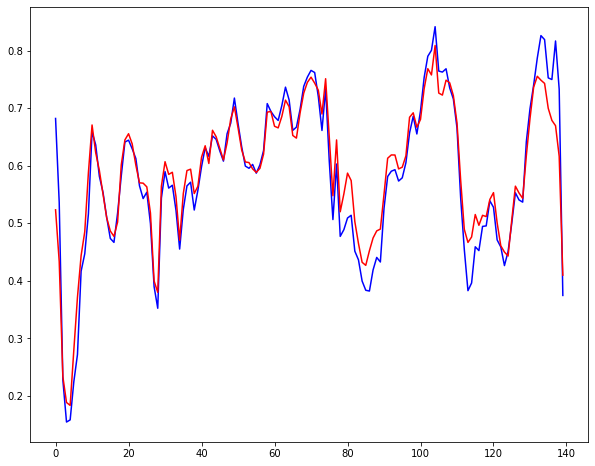

In [104]:
#the model is trained in normal data and the the decoder is also the normal data and still we see a variation because of 
#reconstruction error. When we will pass the anomaly data the reconstruction error will be large and this will show
# anomaly in the data
plt.plot(normal_test_data[0],'b')
plt.plot(decoder_out[0],'r')

In [106]:
encoder_out_a=model.encoder(anomaly_test_data).numpy()
decoder_out_a=model.decoder(encoder_out_a).numpy()

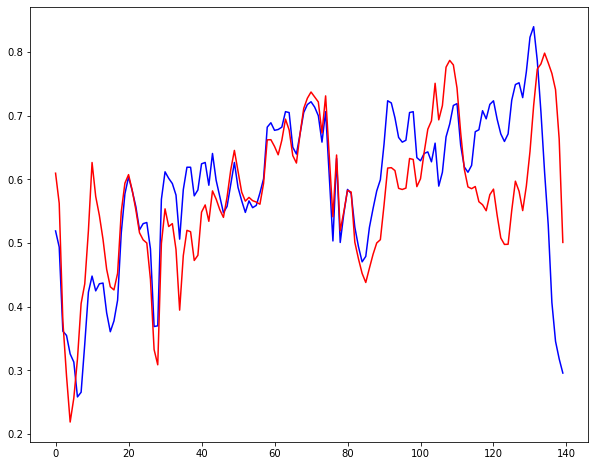

In [107]:
plt.plot(anomaly_test_data[0],'b')
plt.plot(decoder_out_a[0],'r')

(array([ 2., 19., 48., 52., 73., 70., 63., 46., 56., 44., 50., 22., 36.,
        18., 16., 18., 10., 14., 10.,  9.,  7.,  6., 11.,  3.,  6.,  0.,
         3.,  2.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  2.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  2.]),
 array([0.01070812, 0.01311304, 0.01551796, 0.01792288, 0.0203278 ,
        0.02273273, 0.02513765, 0.02754257, 0.02994749, 0.03235241,
        0.03475733, 0.03716226, 0.03956718, 0.0419721 , 0.04437702,
        0.04678194, 0.04918687, 0.05159179, 0.05399671, 0.05640163,
        0.05880655, 0.06121147, 0.0636164 , 0.06602132, 0.06842624,
        0.07083116, 0.07323608, 0.075641  , 0.07804593, 0.08045085,
        0.08285577, 0.08526069, 0.08766561, 0.09007054, 0.09247546,
        0.09488038, 0.0972853 , 0.09969022, 0.10209514, 0.10450007,
        0.10690499, 0.10930991, 0.11171483, 0.11411975, 0.11652468,
        0.1189296 ]),
 <a list of 45 Patch objects>)

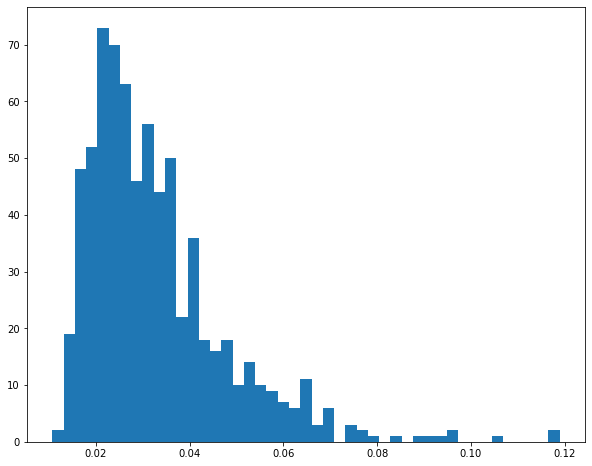

In [110]:
reconstructions=model.predict(normal_test_data)
train_loss=tf.keras.losses.mae(reconstructions,normal_test_data)
plt.hist(train_loss, bins=45)

In [112]:
print(np.mean(train_loss),np.std(train_loss))

0.03289414117260425 0.015055215894920489


In [113]:
#in the reconstrcution error we will define our threshold what is to be defined as normal or anomaly

In [116]:
threshold=np.mean(train_loss)+2*np.std(train_loss)
threshold

0.06300457296244523

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  4., 11., 15.,
        17., 45., 64., 57., 63., 54., 46., 49., 33., 28., 15.,  6.,  1.,
         0.,  1.,  0.,  0.,  0.,  2.,  2.,  2.,  1.,  0.,  0.,  1.,  1.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.0378947 , 0.04100825, 0.0441218 , 0.04723535, 0.0503489 ,
        0.05346245, 0.056576  , 0.05968955, 0.0628031 , 0.06591665,
        0.0690302 , 0.07214375, 0.0752573 , 0.07837085, 0.0814844 ,
        0.08459795, 0.0877115 , 0.09082505, 0.0939386 , 0.09705215,
        0.1001657 , 0.10327925, 0.1063928 , 0.10950635, 0.1126199 ,
        0.11573345, 0.118847  , 0.12196055, 0.1250741 , 0.12818765,
        0.1313012 , 0.13441475, 0.1375283 , 0.14064185, 0.1437554 ,
        0.14686895, 0.1499825 , 0.15309605, 0.1562096 , 0.15932315,
        0.1624367 , 0.16555025, 0.1686638 , 0.17177735, 0.1748909 ,
        0.17800445, 0.181118  , 0.18423155, 0.1873451 , 0.19045865,
        0.1935722 ]),
 <a list of 50

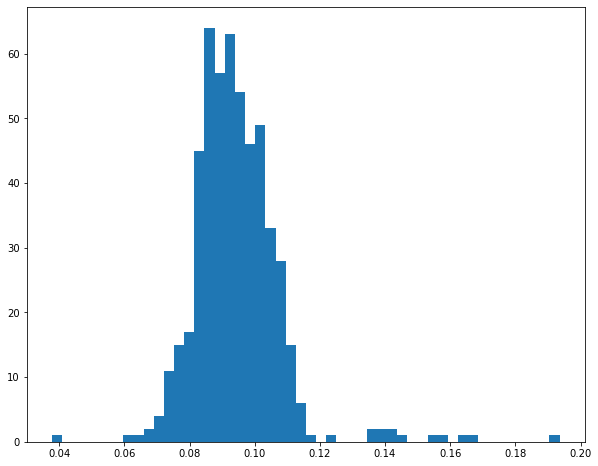

In [120]:
reconstruction_a=model.predict(anomaly_test_data)
train_loss_a=tf.keras.losses.mae(reconstruction_a,anomaly_test_data)

plt.hist(train_loss_a,bins=50)

In [121]:
# above our threshols 0.06 the data will be defined as anomaly

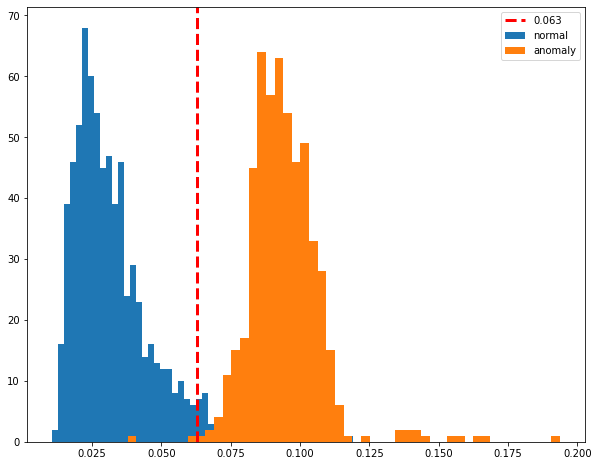

In [122]:
plt.hist(train_loss,bins=50,label='normal')
plt.hist(train_loss_a,bins=50,label='anomaly')
plt.axvline(threshold,color='r',linewidth=3,linestyle='dashed',label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.show()

In [123]:
# to predict the accuracy for the model, we can count how many values are predicted correctly in normal and anomaly

In [127]:
preds=tf.math.less(train_loss, threshold) # preds are defined train_loss less than the threshold
print(tf.math.count_nonzero(preds))# true values
print(preds.shape)

tf.Tensor(688, shape=(), dtype=int64)
(724,)


In [129]:
#724-688= 36 values are predicted wrong

In [131]:
preds_a=tf.math.greater(train_loss_a, threshold)
print(tf.math.count_nonzero(preds_a))
print((preds_a.shape))

tf.Tensor(524, shape=(), dtype=int64)
(526,)


In [132]:
#524-526 =2 was predicted wrong 

In [133]:
# we can calculated the accuracy of the model both in normal and anomaly detection 